In [1]:
import matplotlib.pyplot as plt
import numpy as np

from superfv import AdvectionSolver
import superfv.initial_conditions as ic
import superfv.visualization as vis

In [2]:
N = 256
p = 3

sim = AdvectionSolver(
    ic=lambda idx, x, y, z, t, xp: ic.square(idx, x, y, z, vx=2, vy=1, xp=xp),
    nx=N,
    ny=N,
    p=p,
    interpolation_scheme="transverse",
    ZS=True,
    adaptive_dt=False,
    CFL=1 / 6,
    SED=True,
)

In [3]:
sim.run(n=5)

100%|██████████| 5/5 [00:05<00:00,  1.15s/it]


In [4]:
np.min(sim.minisnapshots["min_rho"]), np.max(sim.minisnapshots["max_rho"])

(np.float64(-0.012941092934686888), np.float64(1.0018827070163012))

/Users/jonathan/Desktop/superfv/superfv/visualization.py:32: UserWarning: Cell-centered coordinate 0.5 not exactly matched in mesh; using nearest: 0.498047
  warnings.warn(
/Users/jonathan/Desktop/superfv/superfv/visualization.py:32: UserWarning: Cell-centered coordinate 0.5 not exactly matched in mesh; using nearest: 0.498047
  warnings.warn(


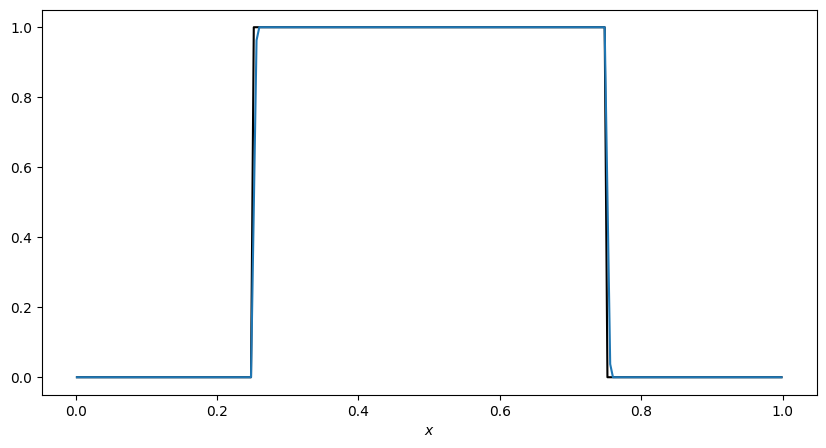

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
vis.plot_1d_slice(sim, ax, "rho", cell_averaged=True, y=0.5, t=0, color="k")
vis.plot_1d_slice(sim, ax, "rho", cell_averaged=True, y=0.5, xlabel=True)

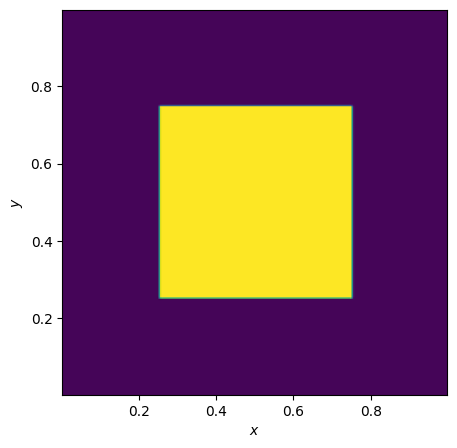

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
vis.plot_2d_slice(sim, ax, "rho", cell_averaged=True)

In [7]:
sim.timer.print_report()

Category                                               Calls      Cumulative Time
-----------------------------------------------------------------------------------
!ExplicitODESolver.integrate.body                          1                 5.77
AdvectionSolver.log_quantity                               7                 0.00
ExplicitODESolver.integrate                                1                 5.84
ExplicitODESolver.take_step                                5                 5.74
FiniteVolumeSolver.f                                      20                 5.69
FiniteVolumeSolver.inplace_apply_bc                      102                 0.01
FiniteVolumeSolver.inplace_compute_fluxes                 20                 5.64
FiniteVolumeSolver.inplace_integrate_fluxes               40                 0.32
FiniteVolumeSolver.inplace_interpolate_faces              40                 1.26
FiniteVolumeSolver.riemann_solver                         40                 0.06
FiniteVolumeSo